In [1]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap 
import lightgbm as lgb
from lime import lime_tabular
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load and preprocess data Train
file_path = 'C:/Users/Ali/Desktop/PREPARE-master/Train-data-preprocessed-2.xlsx'
data = pd.read_excel(file_path)


# Load and preprocess data Test
file_path = 'C:/Users/Ali/Desktop/PREPARE-master/Test-data-preprocessed-2.xlsx'
data_test = pd.read_excel(file_path)

# Define features and target
features = [
    'age_03', 'urban_03', 'married_03', 'n_mar_03', 'edu_gru_03', 'n_living_child_03',
    'migration_03', 'glob_hlth_03', 'adl_dress_03', 'adl_walk_03', 'adl_bath_03', 'adl_eat_03',
    'adl_bed_03', 'adl_toilet_03', 'n_adl_03', 'iadl_money_03', 'iadl_meds_03', 'iadl_shop_03',
    'iadl_meals_03', 'n_iadl_03', 'depressed_03', 'hard_03', 'restless_03', 'happy_03', 'lonely_03',
    'enjoy_03', 'sad_03', 'tired_03', 'energetic_03', 'n_depr_03', 'cesd_depressed_03',
    'hypertension_03', 'diabetes_03', 'resp_ill_03', 'arthritis_03', 'hrt_attack_03', 'stroke_03',
    'cancer_03', 'n_illnesses_03', 'exer_3xwk_03', 'alcohol_03', 'tobacco_03', 'test_chol_03',
    'test_tuber_03', 'test_diab_03', 'test_pres_03', 'hosp_03', 'visit_med_03', 'out_proc_03',
    'visit_dental_03', 'imss_03', 'issste_03', 'pem_def_mar_03', 'insur_private_03', 'insur_other_03',
    'insured_03', 'decis_personal_03', 'employment_03', 'age_12', 'urban_12', 'married_12',
    'n_mar_12', 'edu_gru_12', 'n_living_child_12', 'migration_12', 'glob_hlth_12', 'adl_dress_12',
    'adl_walk_12', 'adl_bath_12', 'adl_eat_12', 'adl_bed_12', 'adl_toilet_12', 'n_adl_12',
    'iadl_money_12', 'iadl_meds_12', 'iadl_shop_12', 'iadl_meals_12', 'n_iadl_12', 'depressed_12',
    'hard_12', 'restless_12', 'happy_12', 'lonely_12', 'enjoy_12', 'sad_12', 'tired_12',
    'energetic_12', 'n_depr_12', 'cesd_depressed_12', 'hypertension_12', 'diabetes_12',
    'resp_ill_12', 'arthritis_12', 'hrt_attack_12', 'stroke_12', 'cancer_12', 'n_illnesses_12',
    'bmi_12', 'exer_3xwk_12', 'alcohol_12', 'tobacco_12', 'test_chol_12', 'test_tuber_12',
    'test_diab_12', 'test_pres_12', 'hosp_12', 'visit_med_12', 'out_proc_12', 'visit_dental_12',
    'imss_12', 'issste_12', 'pem_def_mar_12', 'insur_private_12', 'insur_other_12', 'insured_12',
    'decis_famil_12', 'decis_personal_12', 'employment_12', 'vax_flu_12', 'vax_pneu_12', 'seg_pop_12',
    'care_adult_12', 'care_child_12', 'volunteer_12', 'attends_class_12', 'attends_club_12',
    'reads_12', 'games_12', 'table_games_12', 'comms_tel_comp_12', 'act_mant_12', 'tv_12',
    'sewing_12', 'satis_ideal_12', 'satis_excel_12', 'satis_fine_12', 'cosas_imp_12',
    'wouldnt_change_12', 'memory_12', 'ragender', 'rameduc_m', 'rafeduc_m', 'sgender_03',
    'rearnings_03', 'searnings_03', 'hincome_03', 'hinc_business_03', 'hinc_rent_03', 'hinc_assets_03',
    'hinc_cap_03', 'rinc_pension_03', 'sinc_pension_03', 'rrelgimp_03', 'sgender_12', 'rjlocc_m_12',
    'rearnings_12', 'searnings_12', 'hincome_12', 'hinc_business_12', 'hinc_rent_12', 'hinc_assets_12',
    'hinc_cap_12', 'rinc_pension_12', 'sinc_pension_12', 'rrelgimp_12', 'rrfcntx_m_12',
    'rsocact_m_12', 'rrelgwk_12', 'a34_12', 'j11_12', 'year', 'hincome_change',
    'niadl_change', 'adl_change', 'depr_change', 'glob_hlth_change', 'edu_gru_change',
    'illnesses_change'
    ]

target = 'composite_score'


c:\Users\Ali\anaconda3\envs\moghis\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
######################## Process Train Data ####################
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data[features].mean())
data = pd.DataFrame(data, columns=features + [target])

######################## Process Train Data ####################
data[features] = data[features].apply(pd.to_numeric, errors='coerce')
data[features] = data[features].fillna(data[features].mean())
data = data.dropna(subset=[target])
X_train = data[features]
y_train = data[target]


# Filter features with target between 100 and 200
# X_train = X_train[(y_train >= 100) & (y_train <= 200)]
# y_train = y_train[(y_train >= 100) & (y_train <= 200)]

# X_train = X_train[y_train >= 200]
# y_train = y_train[y_train >= 200]

######################## Process Test Data ####################
data_test[features] = data_test[features].apply(pd.to_numeric, errors='coerce')
data_test[features] = data_test[features].fillna(data[features].mean())
data_test = data_test.dropna(subset=[target])

X_test = data_test[features]
y_test = data_test[target]
############################################

# Filter features with target between 100 and 200
# X_test = X_test[(y_test >= 100) & (y_test <= 200)]
# y_test = y_test[(y_test >= 100) & (y_test <= 200)]

# X_test = X_test[y_test >= 200]
# y_test = y_test[y_test >= 200]


In [3]:

# Calculate and print the mean and variance of the target
mean_target = y_train.mean()
variance_target = y_train.var()
print("Mean of target:", mean_target)
print("Variance of target:", variance_target)

Mean of target: 157.01680865760994
Variance of target: 3709.9727712961753


In [4]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 3 components
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(y_train.values.reshape(-1, 1))

# Extract the means and variances of the distributions
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()

print("Means of the distributions:", means)
print("Variances of the distributions:", variances)

Means of the distributions: [222.56654989 155.89130104  90.10476045]
Variances of the distributions: [1294.69030647  929.79883937 1345.30874032]


In [5]:
# Predict the labels for the training data
gmm_labels = gmm.predict(y_train.values.reshape(-1, 1))

# Divide X_train and y_train into three groups based on GMM labels
group_0_X_train = X_train[gmm_labels == 0]
group_0_y_train = y_train[gmm_labels == 0]

group_1_X_train = X_train[gmm_labels == 1]
group_1_y_train = y_train[gmm_labels == 1]

group_2_X_train = X_train[gmm_labels == 2]
group_2_y_train = y_train[gmm_labels == 2]

# Print the sizes of each group
print("Group 0 size:", group_0_X_train.shape[0])
print("Group 1 size:", group_1_X_train.shape[0])
print("Group 2 size:", group_2_X_train.shape[0])

Group 0 size: 1208
Group 1 size: 1995
Group 2 size: 1140


In [6]:
# Calculate the mean composite score for each cluster
centroid_scores = {}
for i in range(gmm.n_components):
    cluster_indices = np.where(gmm_labels == i)
    cluster_scores = y_train.iloc[cluster_indices]
    centroid_scores[f'Cluster {i}'] = cluster_scores.mean()

# Print the centroid scores
for cluster, score in centroid_scores.items():
    print(f"{cluster} centroid composite score: {score}")

Cluster 0 centroid composite score: 231.15149006622516
Cluster 1 centroid composite score: 155.79298245614035
Cluster 2 centroid composite score: 80.60175438596491


In [7]:
X_train = group_2_X_train
y_train = group_2_y_train

## CatBoost ##

0:	learn: 28.0498249	test: 100.2123418	best: 100.2123418 (0)	total: 152ms	remaining: 3m 5s
100:	learn: 24.1947567	test: 95.0727520	best: 95.0727520 (100)	total: 1s	remaining: 11.1s
200:	learn: 22.0566137	test: 93.2031644	best: 93.2028964 (199)	total: 1.69s	remaining: 8.58s
300:	learn: 19.8974314	test: 92.1774256	best: 92.1774256 (300)	total: 2.42s	remaining: 7.42s
400:	learn: 17.5600523	test: 91.8362845	best: 91.8362845 (400)	total: 3.39s	remaining: 6.95s
500:	learn: 15.7174582	test: 91.6118560	best: 91.5969742 (498)	total: 4.15s	remaining: 6s
600:	learn: 14.2500992	test: 91.6863601	best: 91.5928112 (529)	total: 4.81s	remaining: 4.99s
700:	learn: 12.8668469	test: 91.7236632	best: 91.5928112 (529)	total: 5.65s	remaining: 4.21s
800:	learn: 11.6820203	test: 91.7005399	best: 91.5928112 (529)	total: 6.35s	remaining: 3.35s
900:	learn: 10.5444649	test: 91.7472518	best: 91.5928112 (529)	total: 6.99s	remaining: 2.5s
1000:	learn: 9.5719145	test: 91.7619791	best: 91.5928112 (529)	total: 7.47s	rem

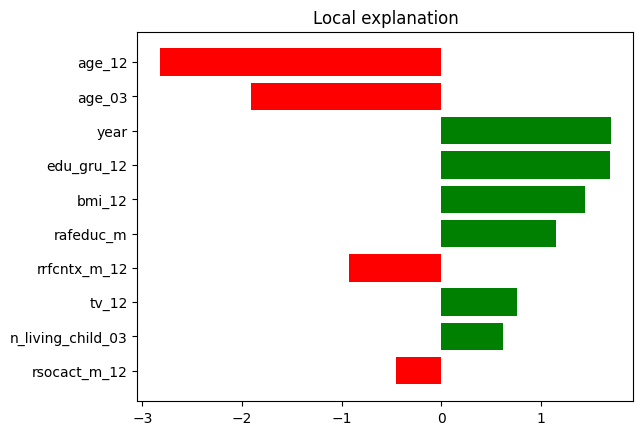

In [8]:
# Best parameters for CatBoost
best_params = {
    'depth': 6,
    'learning_rate': 0.025804617832891515,
    'l2_leaf_reg': 0.22567510948252656,
    'random_strength': 1.8064759944089426,
    'bagging_temperature': 0.4675254776654324,
    'iterations': 1224
}

# Initialize and train CatBoostRegressor
model = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=100, early_stopping_rounds=500, random_state=42)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

y_pred = model.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)



# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()


In [9]:
exp_1 = explanation.as_list()
exp_1 = pd.DataFrame(exp_1, columns=['Feature', 'Weight'])
exp_1

,Feature,Weight
0,age_12,-2.824041
1,age_03,-1.906540
2,year,1.703074
3,edu_gru_12,1.697592
4,bmi_12,1.446226
5,rafeduc_m,1.147539
6,rrfcntx_m_12,-0.923234
7,tv_12,0.760353
8,n_living_child_03,0.617488
9,rsocact_m_12,-0.452840


## LightBoost ##

c:\Users\Ali\anaconda3\envs\moghis\lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 687
[LightGBM] [Info] Number of data points in the train set: 1138, number of used features: 131
[LightGBM] [Info] Start training from score 80.579965
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 500 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

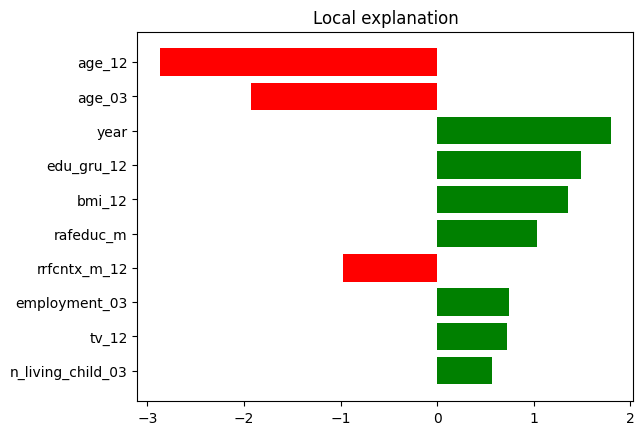

In [10]:
# Split the data
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for CatBoost
best_params = {
  'learning_rate': 0.07089438962267576,
  'num_leaves': 49,
  'max_depth': 4,
  'feature_fraction': 0.4839642718097913,
  'bagging_fraction': 0.5497799156909652,
  'lambda_l1': 0.058207015936292725,
  'lambda_l2': 0.08350139961819975,
  'min_child_samples': 85,
  'n_estimators': 4077
}

model2 = lgb.train(
    params=best_params,
    train_set=lgb.Dataset(X_train1, label=y_train1),
    valid_sets=lgb.Dataset(X_val1, label=y_val1),
    num_boost_round=best_params['n_estimators'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=500, verbose=True),
    ]
)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()


In [11]:
exp_2 = explanation.as_list()
exp_2 = pd.DataFrame(exp_1, columns=['Feature', 'Weight'])

## Random Forest 


LIME Explanation for a single instance:
age_12: -2.7833626087802075
age_03: -1.8723882381119927
year: 1.8583290682266296
edu_gru_12: 1.7140063496398834
bmi_12: 1.292224590328612
rafeduc_m: 0.8019956667489588
rrfcntx_m_12: -0.7893575752324861
employment_03: 0.7559081017526319
tv_12: 0.5771757196655245
n_living_child_03: 0.5120574614888262


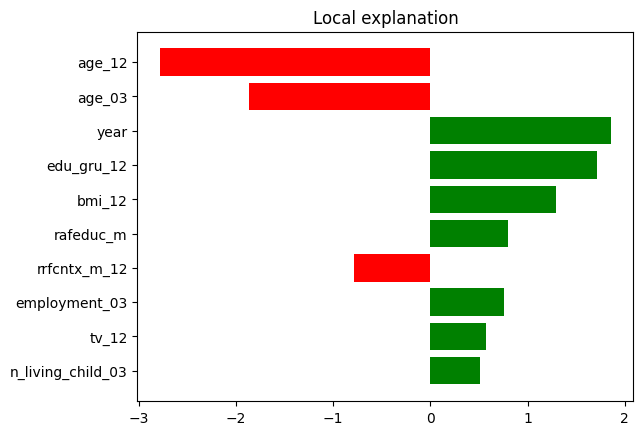

In [12]:
# Best parameters for CatBoost
best_params = {
  'max_depth': 30,
  'min_samples_split': 22,
  'min_samples_leaf': 6,
  'max_features': 0.8191960808589205,
  'n_estimators': 97
}

model2 = RandomForestRegressor(**best_params, random_state=42)
model2.fit(X_train, y_train)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()

In [13]:
exp_3 = explanation.as_list()
exp_3 = pd.DataFrame(exp_1, columns=['Feature', 'Weight'])

## XGBoost

[0]	validation_0-rmse:15.92894
[1]	validation_0-rmse:16.11425
[2]	validation_0-rmse:16.10542
[3]	validation_0-rmse:16.03999
[4]	validation_0-rmse:16.00369
[5]	validation_0-rmse:16.15891
[6]	validation_0-rmse:16.52952
[7]	validation_0-rmse:16.47730
[8]	validation_0-rmse:16.55057
[9]	validation_0-rmse:16.56237
[10]	validation_0-rmse:16.91193
[11]	validation_0-rmse:17.13821
[12]	validation_0-rmse:17.27710
[13]	validation_0-rmse:17.65086
[14]	validation_0-rmse:17.66259
[15]	validation_0-rmse:17.82261
[16]	validation_0-rmse:18.00151
[17]	validation_0-rmse:18.15185
[18]	validation_0-rmse:18.30379
[19]	validation_0-rmse:18.21768
[20]	validation_0-rmse:18.22927
[21]	validation_0-rmse:18.29827
[22]	validation_0-rmse:18.80746
[23]	validation_0-rmse:19.14759
[24]	validation_0-rmse:19.02662
[25]	validation_0-rmse:19.08052
[26]	validation_0-rmse:19.34278
[27]	validation_0-rmse:19.24517
[28]	validation_0-rmse:19.46571
[29]	validation_0-rmse:19.71169
[30]	validation_0-rmse:19.91813
[31]	validation_0-

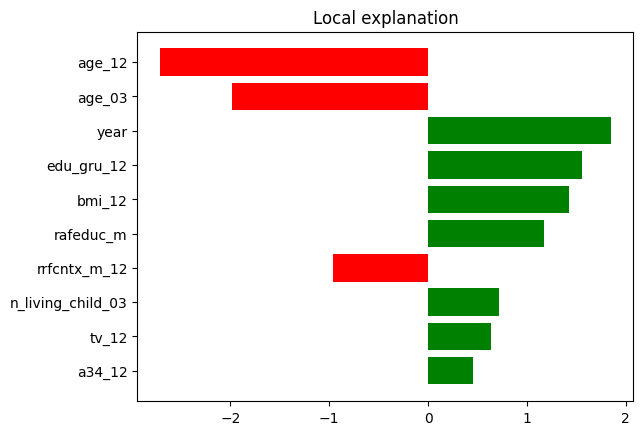

In [14]:
# Split the data
X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train, y_train, test_size=0.001, random_state=42)

# Best parameters for XGBoost
best_params = {
  'learning_rate': 0.033763045458285304,
  'max_depth': 3,
  'min_child_weight': 14,
  'subsample': 0.9500263286639197,
  'colsample_bytree': 0.7747635615654157,
  'gamma': 7.558507636378349,
  'reg_alpha': 0.4378783168336932,
  'reg_lambda': 2.8408676886824322,
  'n_estimators': 2804
  }


model2 = XGBRegressor(**best_params, random_state=42)
model2.fit(X_train2, y_train2, eval_set=[(X_val2, y_val2)], verbose=True)

# Make predictions
y_pred = model2.predict(X_test)

# Initialize LIME explainer with discretization disabled
explainer = lime_tabular.LimeTabularExplainer(training_data= X_train.values, feature_names= features, mode='regression', discretize_continuous=False)

# Explain a single prediction
sample_index = 0  # Select a sample from test data
explanation = explainer.explain_instance(data_row=X_test.values[sample_index], predict_fn=model.predict)

# Print explanation
print("\nLIME Explanation for a single instance:")
for feature, weight in explanation.as_list():
    print(f"{feature}: {weight}")

# Plot explanation
explanation.as_pyplot_figure()
plt.show()

In [15]:
exp_4 = explanation.as_list()
exp_4 = pd.DataFrame(exp_1, columns=['Feature', 'Weight'])

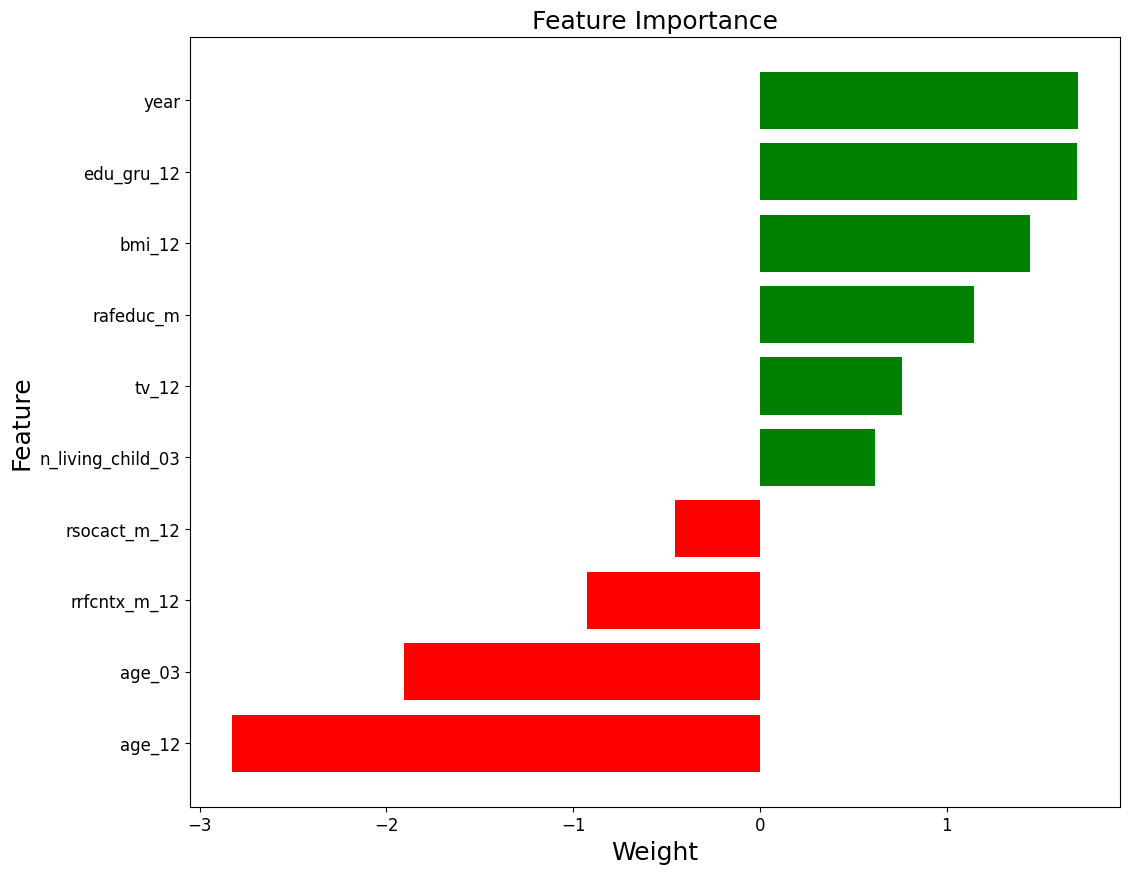

In [16]:
# Combine all explanations into a single DataFrame
all_explanations = pd.concat([exp_1, exp_2, exp_3, exp_4])

Coeff = {
    "lgb": 0.25985829,
    "catboost": 0.38508924,
    "xgb": 0.21887303,
    "rf": 0.13617944
}

lgb = exp_1
catbosst = exp_2
xgb = exp_3
rf = exp_4

lgb['Weight'] = lgb['Weight'] * Coeff['lgb']
catbosst['Weight'] = catbosst['Weight'] * Coeff['catboost']
xgb['Weight'] = xgb['Weight'] * Coeff['xgb']
rf['Weight'] = rf['Weight'] * Coeff['rf']

feature_importance = pd.concat([lgb, catbosst, xgb, rf])
feature_importance = feature_importance.groupby('Feature').sum().reset_index()


# Sort the features by importance
feature_importance = feature_importance.sort_values(by='Weight', ascending=False).reset_index(drop=True)

# Display the feature importance
feature_importance
plt.figure(figsize=(12, 10))
colors = ['green' if weight > 0 else 'red' for weight in feature_importance['Weight']]
plt.barh(feature_importance['Feature'], feature_importance['Weight'], color=colors)
plt.xlabel('Weight', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.title('Feature Importance', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().invert_yaxis()
plt.show()
